### Imports and set up

In [2]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = 'Final_Results.json'
show_values = True

In [4]:
with open(file, 'r') as file:
    full_data = json.load(file)

In [5]:
data = {}
data_TP = {}
data_FP = {}
counter = 0
for ref in full_data:
    ref_id = ref['sha1']
    data[ref_id] = []
    data_TP[ref_id] = []
    data_FP[ref_id] = []
    for refactorings in ref['refactorings']:
        data[ref_id].append(refactorings['refactoringType'])
        if refactorings['validation'] == 'TP':
            data_TP[ref_id].append(refactorings['refactoringType'])
        elif refactorings['validation'] == 'FP':
            data_FP[ref_id].append(refactorings['refactoringType'])
        else:
            counter += 1
data_full = data
print(counter)

31


In [10]:
def add_labels(ax, orient='v', show_values=show_values):
    if show_values:
        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")
        else:
            for p in ax.patches:
                _x = p.get_width() + max(ax.patches, key=lambda x: x.get_width()).get_width() * 0.01 
                _y = p.get_y() + p.get_height() / 2
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", va="center")

### Analysis full

In [17]:
num_files = len(data)
single_refactoring = sum(1 for v in data.values() if len(v) == 1)
single_type_refactoring = sum(1 for v in data.values() if len(set(v)) == 1)
number_refactorings = sum(len(v) for v in data.values())
number_refactoring_types = len(set(ref for types in data.values() for ref in types))
refactoring_combinations = Counter(tuple(sorted(set(v))) for v in data.values())
distribution_refactorings = Counter(type for types in data.values() for type in types)
distribution_files_ref_count = Counter(len(v) for v in data.values())
distribuion_files_ref_type_count = Counter(len(set(v)) for v in data.values())
distribution_single_refactoring = Counter(v[0] for v in data.values() if len(v) == 1)
distribution_single_type_refactoring = Counter(v[0] for v in data.values() if len(set(v)) == 1)

In [18]:
print("Total number of files:", num_files)
print("Number of files with only one refactoring:", single_refactoring)
print("Number of files with only one type of refactoring:", single_type_refactoring)
print("Total number of refactorings:", number_refactorings)
print("Total number of refactoring types:", number_refactoring_types)
print("Combinations of refactoring types and their counts:", dict(refactoring_combinations))
print("Distribution of refactoring types:", dict(distribution_refactorings))
print("Distribution of files with refactoring counts:", dict(distribution_files_ref_count))
print("Distribution of files with refactoring type counts:", dict(distribuion_files_ref_type_count))
print("Distribution of files with one refactoring:", dict(distribution_single_refactoring))
print("Distribution of files with one type of refactoring:", dict(distribution_single_type_refactoring))

Total number of files: 200
Number of files with only one refactoring: 24
Number of files with only one type of refactoring: 55
Total number of refactorings: 2434
Total number of refactoring types: 21
Combinations of refactoring types and their counts: {('RenameClass',): 4, ('RenameMethod',): 14, ('RenameField', 'RenameMethod'): 2, ('ChangeMethodParameters', 'InlineMethod'): 5, ('ChangeMethodParameters', 'RenameMethod'): 14, ('ExtractSuperClass',): 1, ('ChangeMethodParameters', 'RenameClass', 'RenameMethod'): 5, ('ChangeMethodParameters',): 29, ('ChangeMethodParameters', 'ExtractMethod', 'MoveAndInlineMethod', 'RenameMethod'): 1, ('InlineMethod', 'MoveMethod'): 1, ('ChangeMethodParameters', 'MoveClass', 'RenameField', 'RenameMethod'): 1, ('MoveAndRenameClass', 'MoveClass'): 3, ('ChangeMethodParameters', 'ExtractClass', 'MoveAndChangeMethodParameters', 'MoveAndRenameClass', 'MoveMethod', 'RenameClass', 'RenameMethod'): 1, ('ChangeMethodParameters', 'ExtractInterface', 'MoveClass', 'MoveM

### Visuals full

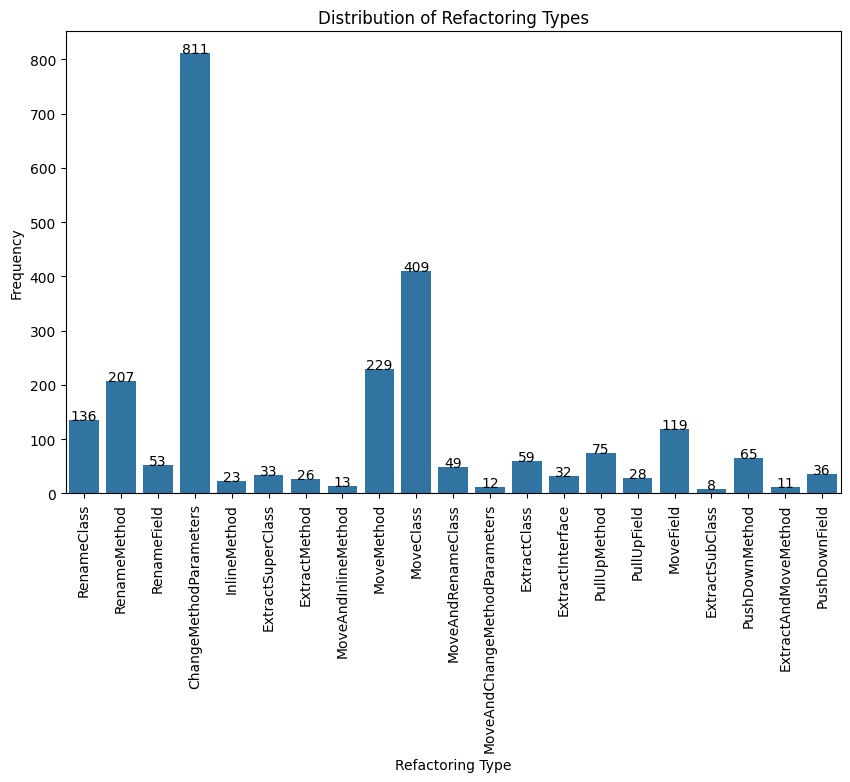

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_refactorings.keys()), y=list(distribution_refactorings.values()))
plt.title('Distribution of Refactoring Types')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
add_labels(ax)
plt.show()

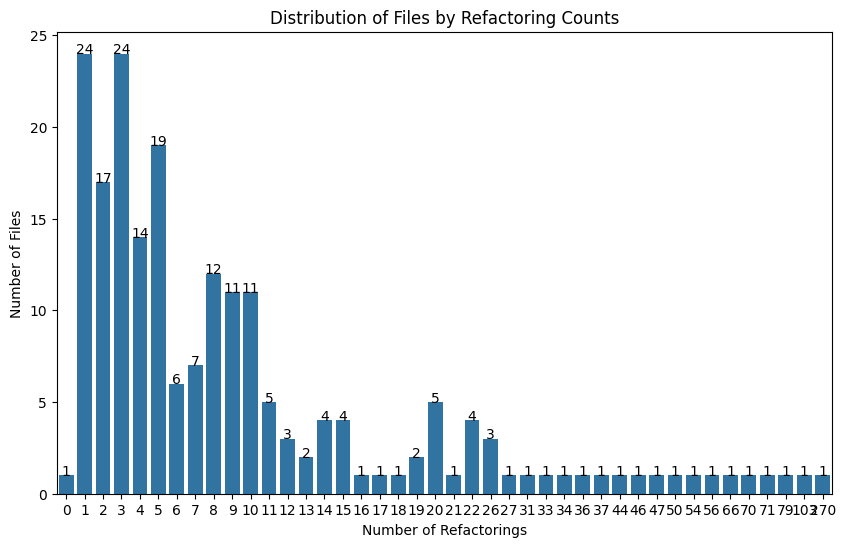

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_files_ref_count.keys()), y=list(distribution_files_ref_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

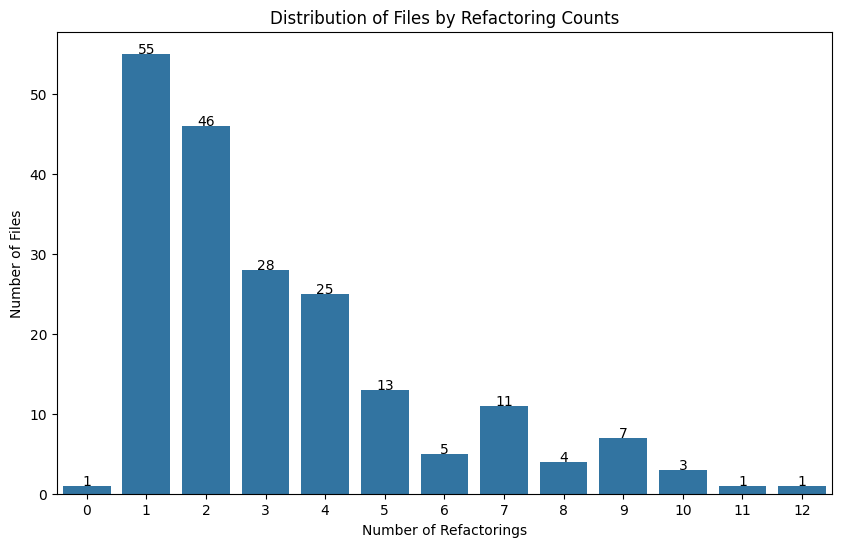

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribuion_files_ref_type_count.keys()), y=list(distribuion_files_ref_type_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

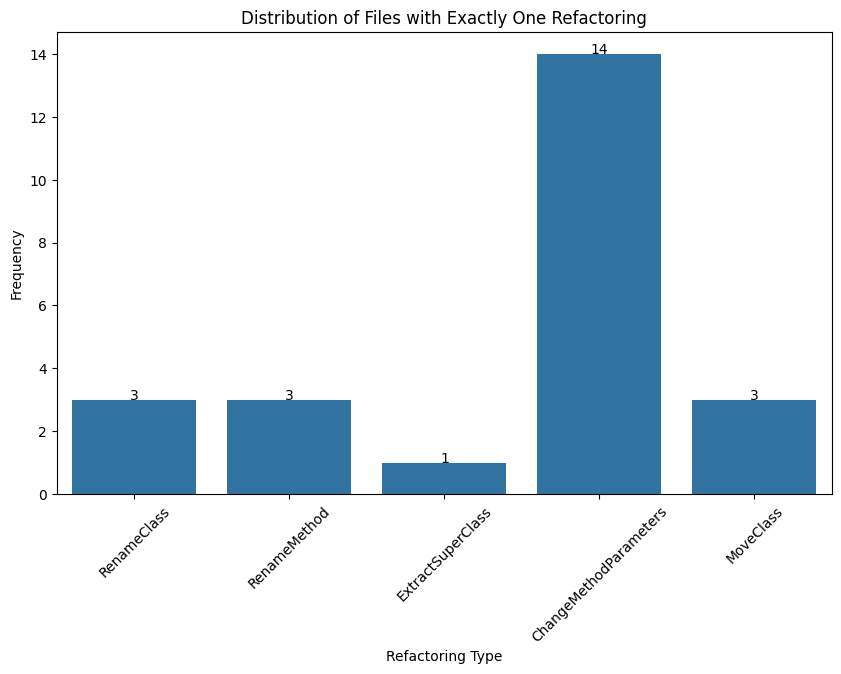

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_refactoring.keys()), y=list(distribution_single_refactoring.values()))
plt.title('Distribution of Files with Exactly One Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

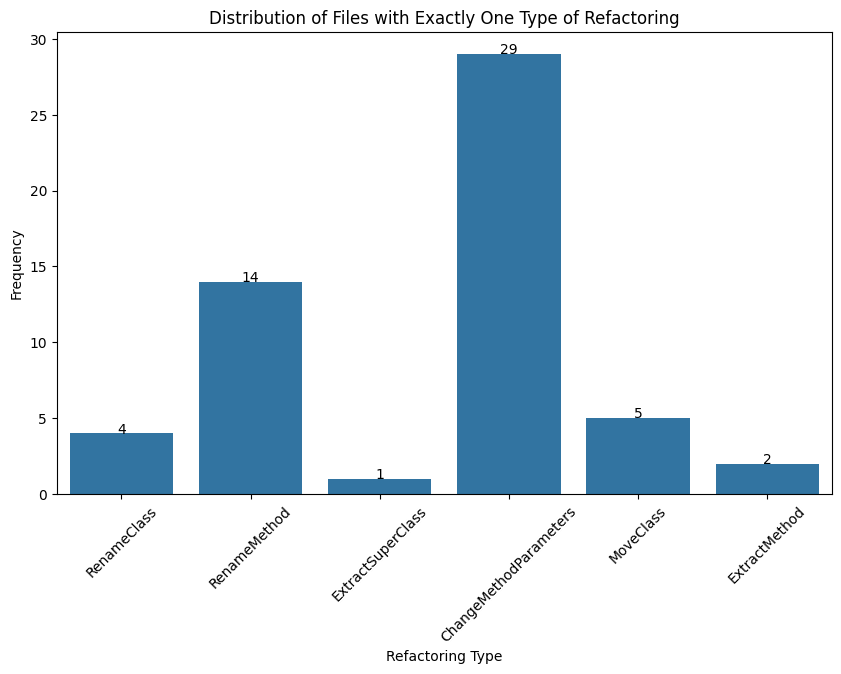

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_type_refactoring.keys()), y=list(distribution_single_type_refactoring.values()))
plt.title('Distribution of Files with Exactly One Type of Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()


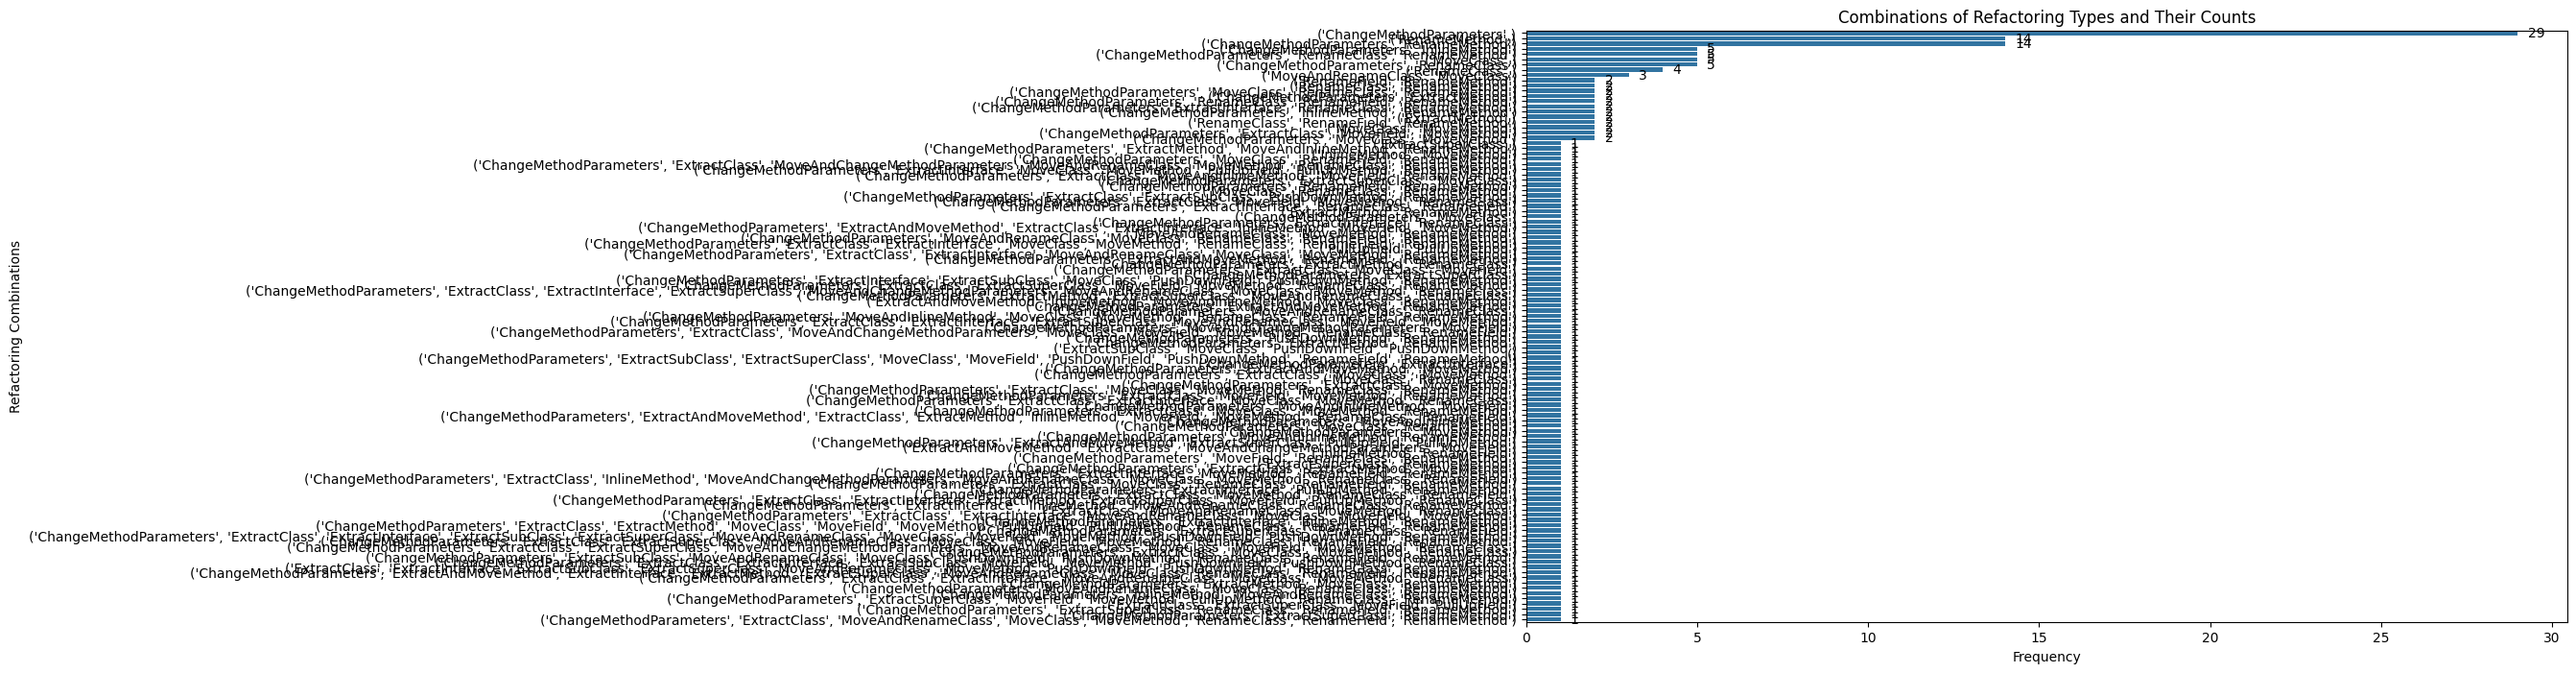

In [15]:
combination_counts = [(str(k), v) for k, v in refactoring_combinations.items() if v > 1]
combinations, counts = zip(*sorted(combination_counts, key=lambda x: x[1], reverse=True))
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=list(counts), y=list(combinations))
plt.title('Combinations of Refactoring Types and Their Counts')
plt.xlabel('Frequency')
plt.ylabel('Refactoring Combinations')
add_labels(ax, orient='h')
plt.show()

### Analysis FP

In [23]:
data = data_FP
num_files = len(data)
single_refactoring = sum(1 for v in data.values() if len(v) == 1)
single_type_refactoring = sum(1 for v in data.values() if len(set(v)) == 1)
number_refactorings = sum(len(v) for v in data.values())
number_refactoring_types = len(set(ref for types in data.values() for ref in types))
refactoring_combinations = Counter(tuple(sorted(set(v))) for v in data.values())
distribution_refactorings = Counter(type for types in data.values() for type in types)
distribution_files_ref_count = Counter(len(v) for v in data.values())
distribuion_files_ref_type_count = Counter(len(set(v)) for v in data.values())
distribution_single_refactoring = Counter(v[0] for v in data.values() if len(v) == 1)
distribution_single_type_refactoring = Counter(v[0] for v in data.values() if len(set(v)) == 1)

In [24]:
print("Total number of files:", num_files)
print("Number of files with only one refactoring:", single_refactoring)
print("Number of files with only one type of refactoring:", single_type_refactoring)
print("Total number of refactorings:", number_refactorings)
print("Total number of refactoring types:", number_refactoring_types)
print("Combinations of refactoring types and their counts:", dict(refactoring_combinations))
print("Distribution of refactoring types:", dict(distribution_refactorings))
print("Distribution of files with refactoring counts:", dict(distribution_files_ref_count))
print("Distribution of files with refactoring type counts:", dict(distribuion_files_ref_type_count))
print("Distribution of files with one refactoring:", dict(distribution_single_refactoring))
print("Distribution of files with one type of refactoring:", dict(distribution_single_type_refactoring))

Total number of files: 200
Number of files with only one refactoring: 28
Number of files with only one type of refactoring: 38
Total number of refactorings: 360
Total number of refactoring types: 19
Combinations of refactoring types and their counts: {(): 128, ('RenameClass',): 3, ('RenameMethod',): 5, ('ChangeMethodParameters', 'MoveClass'): 1, ('ExtractClass', 'MoveAndRenameClass', 'MoveMethod'): 1, ('MoveAndRenameClass',): 1, ('MoveMethod',): 1, ('MoveAndInlineMethod',): 1, ('ChangeMethodParameters',): 14, ('ChangeMethodParameters', 'ExtractClass', 'MoveField', 'MoveMethod'): 1, ('ExtractMethod',): 2, ('RenameClass', 'RenameMethod'): 1, ('ChangeMethodParameters', 'ExtractInterface'): 2, ('ChangeMethodParameters', 'ExtractAndMoveMethod', 'ExtractClass', 'ExtractInterface', 'InlineMethod', 'MoveMethod'): 1, ('ExtractClass', 'MoveMethod'): 3, ('ChangeMethodParameters', 'ExtractClass', 'MoveMethod'): 4, ('ChangeMethodParameters', 'ExtractClass', 'MoveField', 'MoveMethod', 'RenameClass',

### Visuals FP

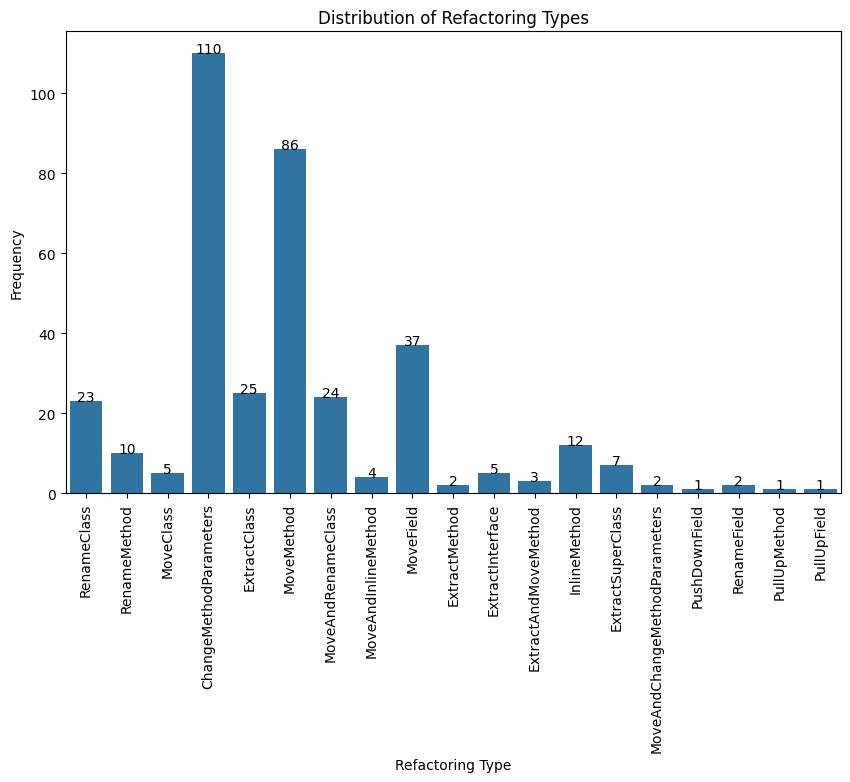

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_refactorings.keys()), y=list(distribution_refactorings.values()))
plt.title('Distribution of Refactoring Types')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
add_labels(ax)
plt.show()

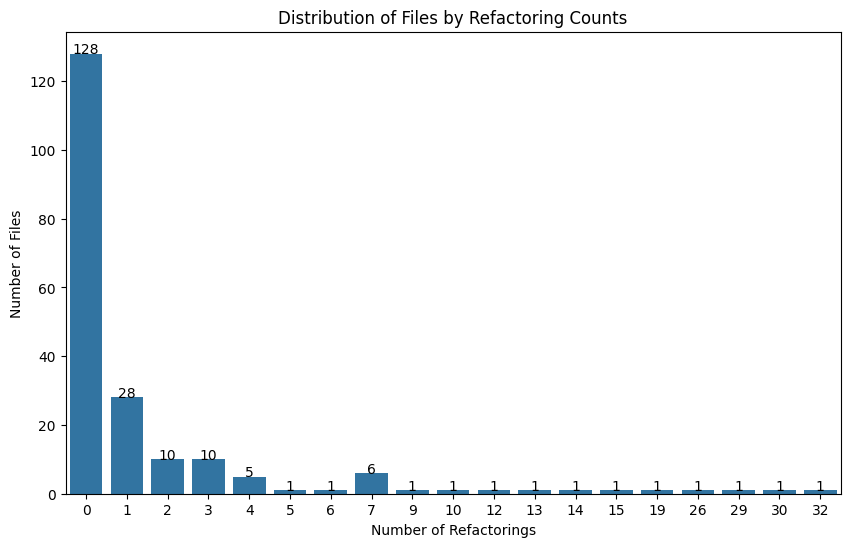

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_files_ref_count.keys()), y=list(distribution_files_ref_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

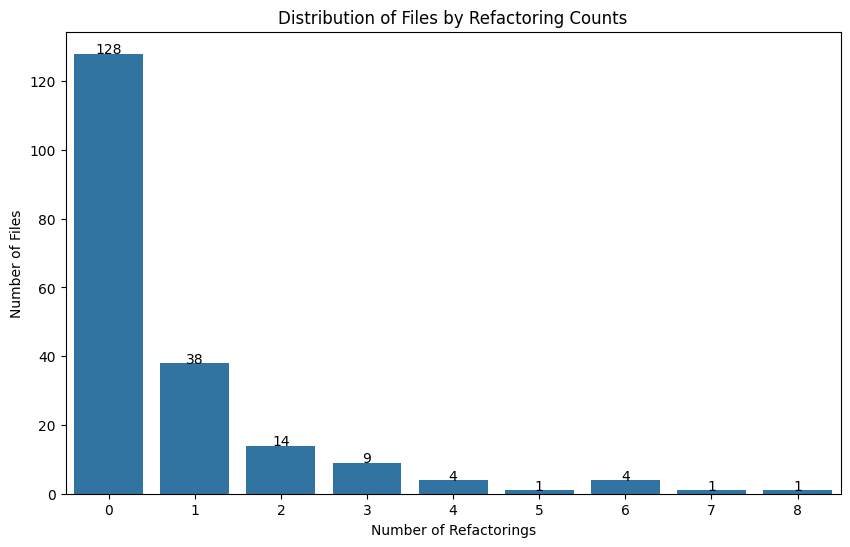

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribuion_files_ref_type_count.keys()), y=list(distribuion_files_ref_type_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

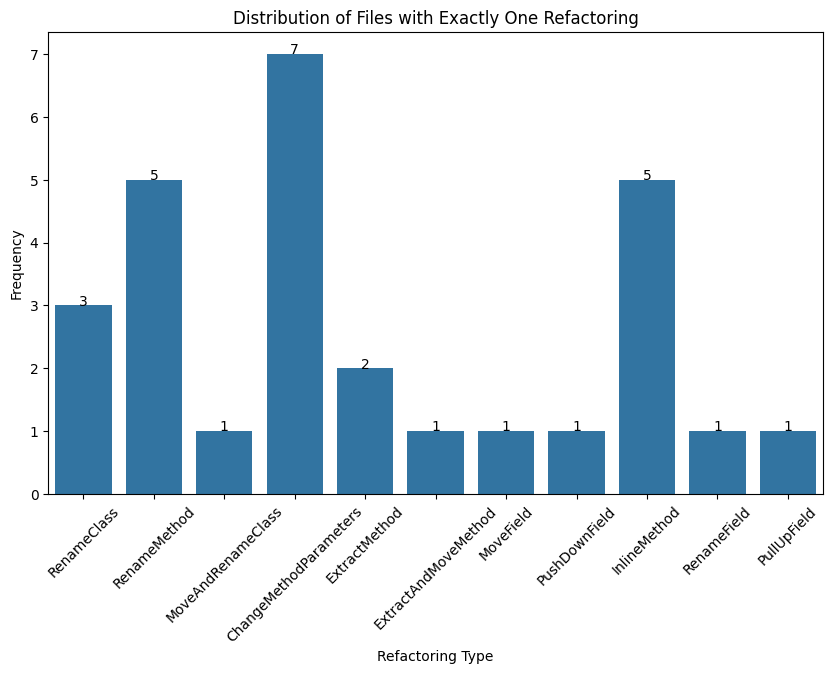

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_refactoring.keys()), y=list(distribution_single_refactoring.values()))
plt.title('Distribution of Files with Exactly One Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

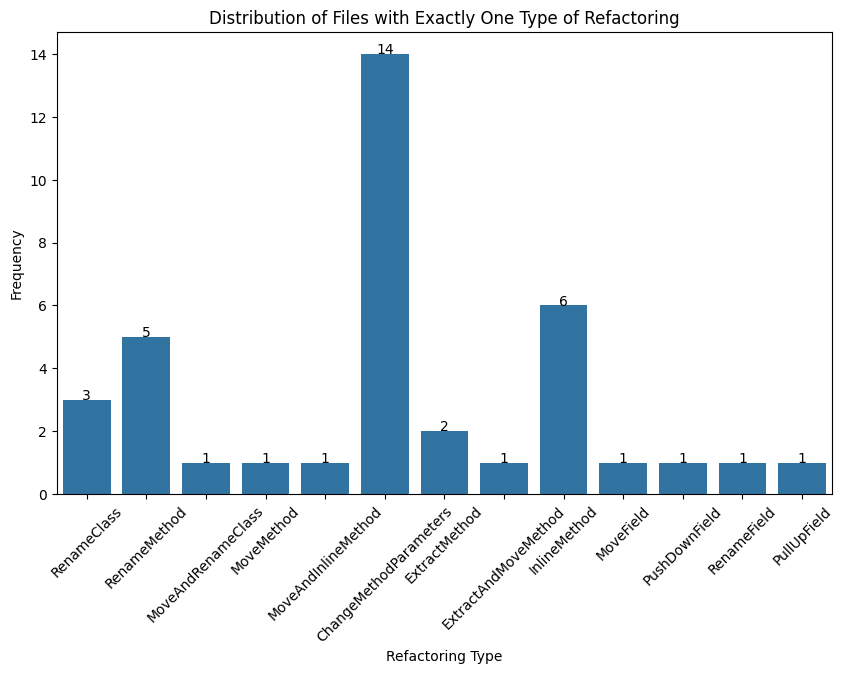

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_type_refactoring.keys()), y=list(distribution_single_type_refactoring.values()))
plt.title('Distribution of Files with Exactly One Type of Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

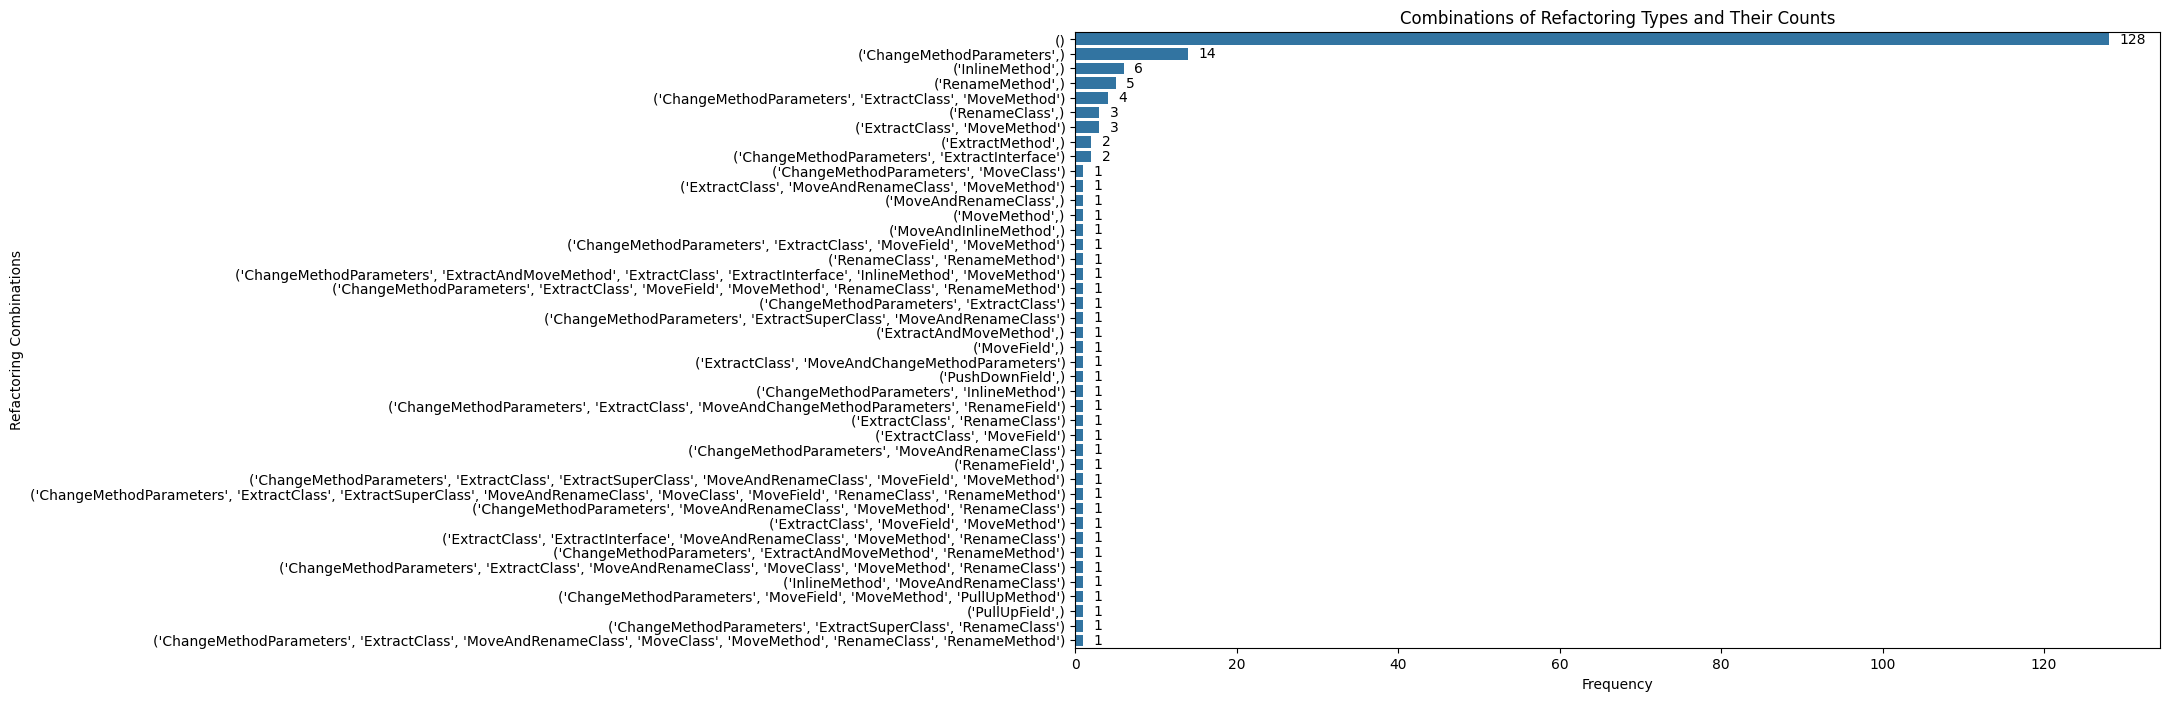

In [30]:
combination_counts = [(str(k), v) for k, v in refactoring_combinations.items() if v > 1]
combinations, counts = zip(*sorted(combination_counts, key=lambda x: x[1], reverse=True))
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=list(counts), y=list(combinations))
plt.title('Combinations of Refactoring Types and Their Counts')
plt.xlabel('Frequency')
plt.ylabel('Refactoring Combinations')
add_labels(ax, orient='h')
plt.show()

### Analysis TP

In [7]:
data = data_TP
num_files = len(data)
single_refactoring = sum(1 for v in data.values() if len(v) == 1)
single_type_refactoring = sum(1 for v in data.values() if len(set(v)) == 1)
number_refactorings = sum(len(v) for v in data.values())
number_refactoring_types = len(set(ref for types in data.values() for ref in types))
refactoring_combinations = Counter(tuple(sorted(set(v))) for v in data.values())
distribution_refactorings = Counter(type for types in data.values() for type in types)
distribution_files_ref_count = Counter(len(v) for v in data.values())
distribuion_files_ref_type_count = Counter(len(set(v)) for v in data.values())
distribution_single_refactoring = Counter(v[0] for v in data.values() if len(v) == 1)
distribution_single_type_refactoring = Counter(v[0] for v in data.values() if len(set(v)) == 1)

In [8]:
print("Total number of files:", num_files)
print("Number of files with only one refactoring:", single_refactoring)
print("Number of files with only one type of refactoring:", single_type_refactoring)
print("Total number of refactorings:", number_refactorings)
print("Total number of refactoring types:", number_refactoring_types)
print("Combinations of refactoring types and their counts:", dict(refactoring_combinations))
print("Distribution of refactoring types:", dict(distribution_refactorings))
print("Distribution of files with refactoring counts:", dict(distribution_files_ref_count))
print("Distribution of files with refactoring type counts:", dict(distribuion_files_ref_type_count))
print("Distribution of files with one refactoring:", dict(distribution_single_refactoring))
print("Distribution of files with one type of refactoring:", dict(distribution_single_type_refactoring))

Total number of files: 200
Number of files with only one refactoring: 30
Number of files with only one type of refactoring: 66
Total number of refactorings: 2043
Total number of refactoring types: 21
Combinations of refactoring types and their counts: {('RenameClass',): 6, ('RenameMethod',): 14, ('RenameField', 'RenameMethod'): 3, ('ChangeMethodParameters', 'InlineMethod'): 2, ('ChangeMethodParameters', 'RenameMethod'): 17, ('ExtractSuperClass',): 1, ('ChangeMethodParameters',): 37, ('ChangeMethodParameters', 'ExtractMethod', 'MoveAndInlineMethod', 'RenameMethod'): 1, ('InlineMethod', 'MoveMethod'): 1, ('ChangeMethodParameters', 'RenameField', 'RenameMethod'): 2, ('MoveAndRenameClass', 'MoveClass'): 2, ('ChangeMethodParameters', 'MoveAndChangeMethodParameters', 'RenameClass', 'RenameMethod'): 1, ('MoveClass',): 6, ('ChangeMethodParameters', 'ExtractInterface', 'MoveClass', 'PullUpField', 'PullUpMethod', 'RenameMethod'): 1, ('ChangeMethodParameters', 'ExtractClass', 'MoveField', 'Rename

### Visuals FP

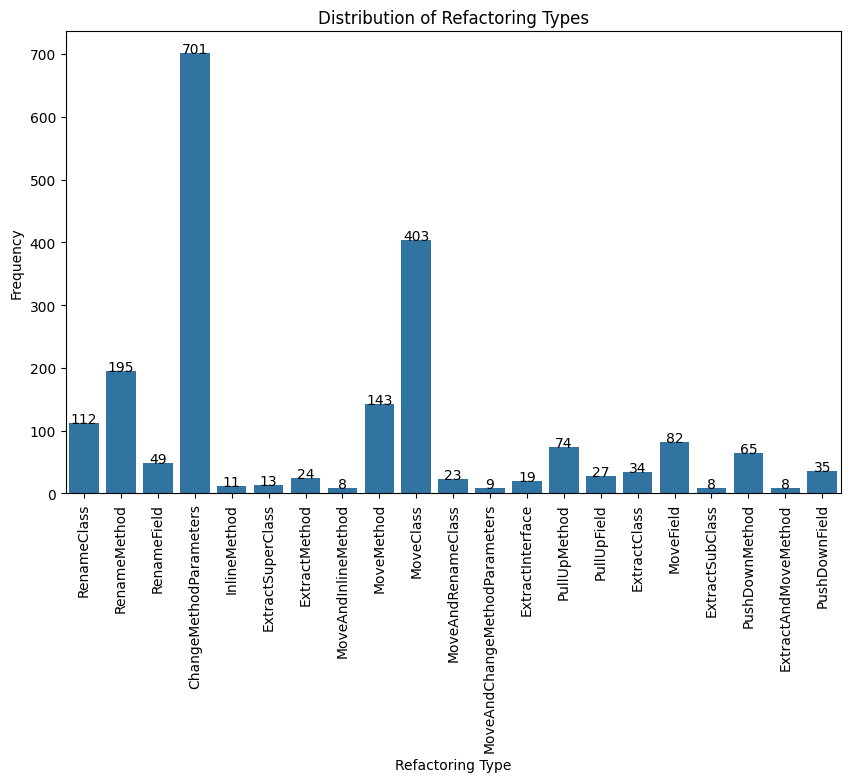

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_refactorings.keys()), y=list(distribution_refactorings.values()))
plt.title('Distribution of Refactoring Types')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
add_labels(ax)
plt.show()

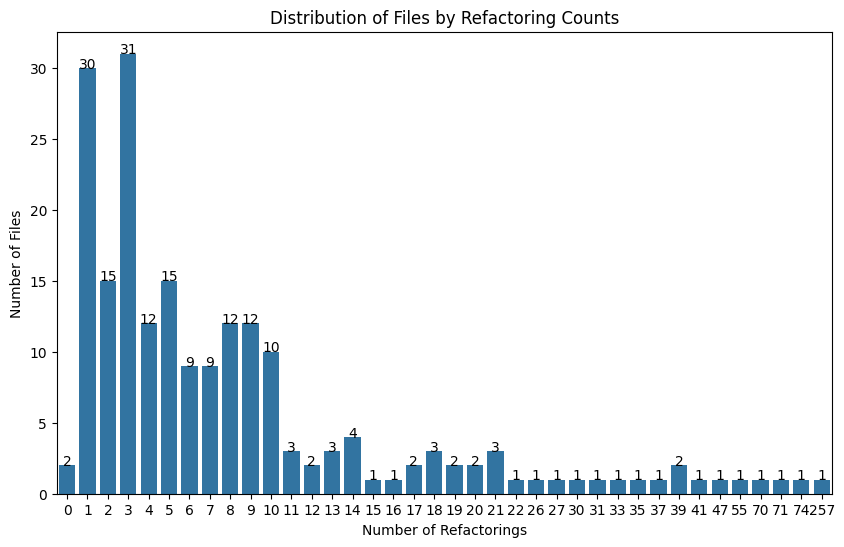

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_files_ref_count.keys()), y=list(distribution_files_ref_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

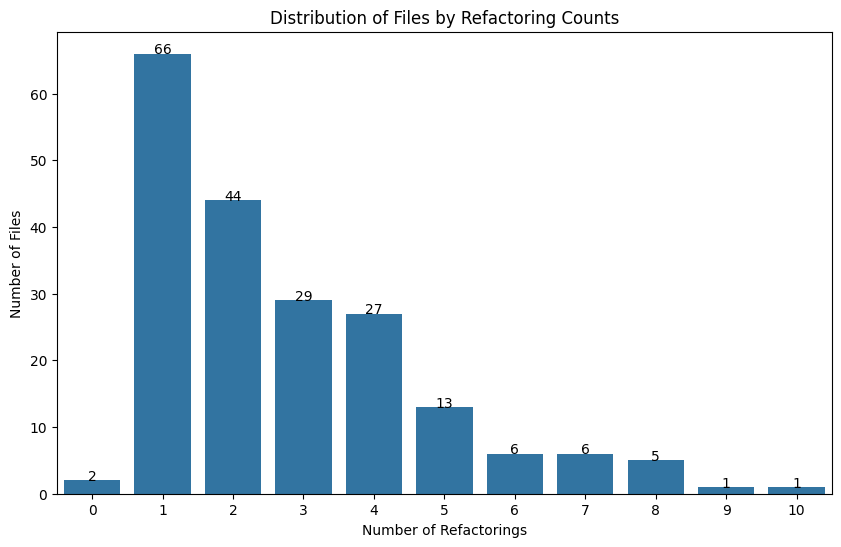

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribuion_files_ref_type_count.keys()), y=list(distribuion_files_ref_type_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

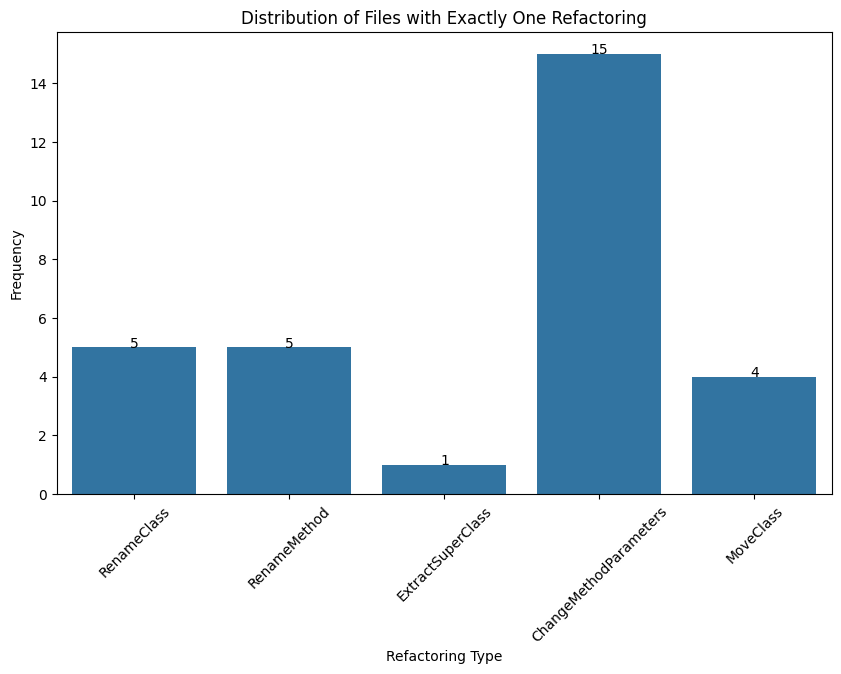

In [36]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_refactoring.keys()), y=list(distribution_single_refactoring.values()))
plt.title('Distribution of Files with Exactly One Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

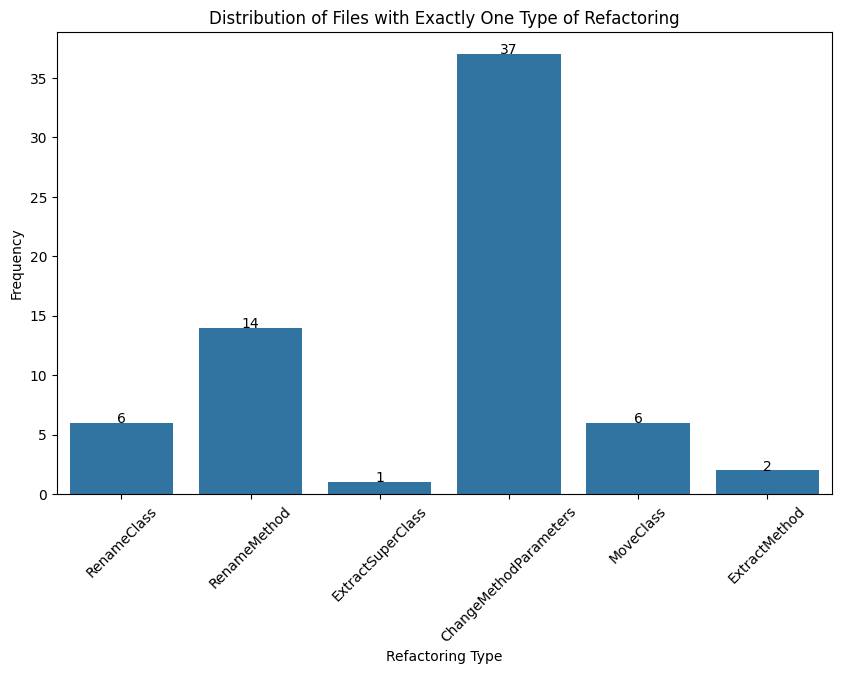

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_type_refactoring.keys()), y=list(distribution_single_type_refactoring.values()))
plt.title('Distribution of Files with Exactly One Type of Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

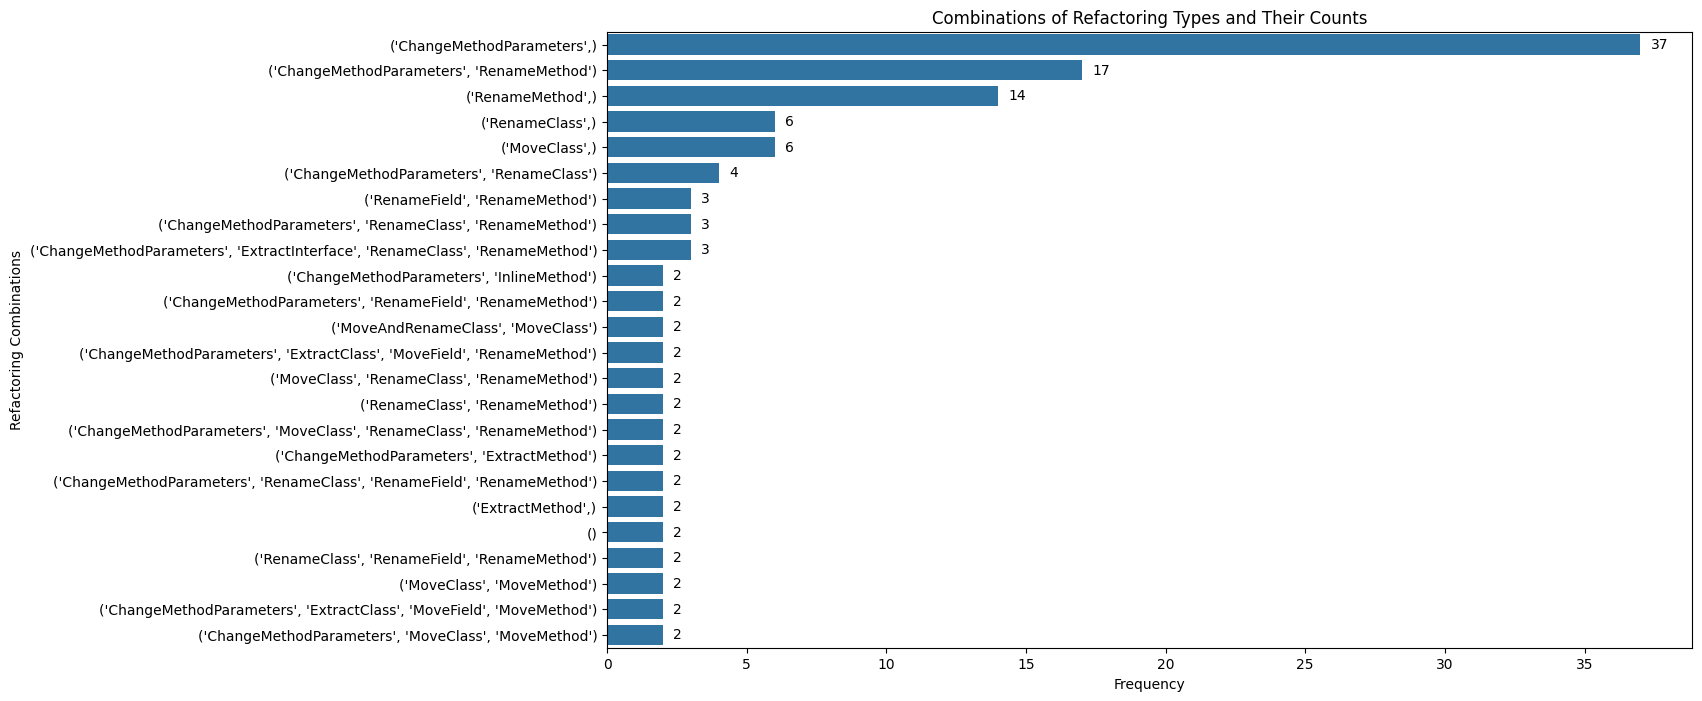

In [12]:
combination_counts = [(str(k), v) for k, v in refactoring_combinations.items() if v > 1]
combinations, counts = zip(*sorted(combination_counts, key=lambda x: x[1], reverse=True))
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=list(counts), y=list(combinations))
plt.title('Combinations of Refactoring Types and Their Counts')
plt.xlabel('Frequency')
plt.ylabel('Refactoring Combinations')
add_labels(ax, orient='h')
plt.show()

### Manual Anlaysis